# NOTE: This is not my main Python code that I coded and used! The other notebook is much more well-documented and commented. This is just a test notebook I copied and pasted from the original code (see citation: [1]) in which I got lucky and managed to get a spontaneous spin-flip for my entire system. See code block 95 (at the bottom) for the lucky experiment!

In [71]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [72]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

In [73]:
## change these parameters for a smaller (faster) simulation 
nt      = 1#88         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 10240       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = [2.0]#np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [76]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    MagArrayT2 = []
    Mag2ArrayT2 = []
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves
        Mag = calcMag(config) 
        MagArrayT2.append(float(Mag)/float(N*N))
        Mag2ArrayT2.append((float(Mag)/float(N*N))*(float(Mag)/float(N*N)))

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation
        
        MagArrayT2.append(float(Mag)/float(N*N))
        Mag2ArrayT2.append((float(Mag)/float(N*N))*(float(Mag)/float(N*N)))

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

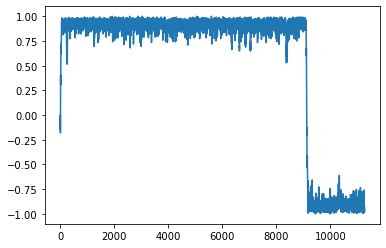

In [77]:
plt.plot(MagArrayT2)

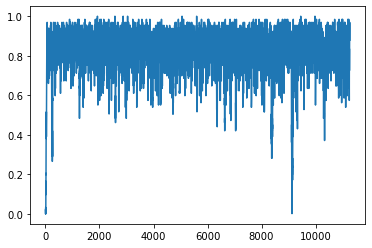

In [78]:
plt.plot(Mag2ArrayT2)

In [79]:
## change these parameters for a smaller (faster) simulation 
nt      = 1#88         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 10240       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = [3.0]#np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [88]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    MagArrayT3 = []
    Mag2ArrayT3 = []
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves
        Mag = calcMag(config)
        MagArrayT3.append(float(Mag)/float(N*N))
        Mag2ArrayT3.append((float(Mag)/float(N*N))*(float(Mag)/float(N*N)))
    
    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        MagArrayT3.append(float(Mag)/float(N*N))
        Mag2ArrayT3.append((float(Mag)/float(N*N))*(float(Mag)/float(N*N)))
        
        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

In [89]:
#print(MagArrayT3)


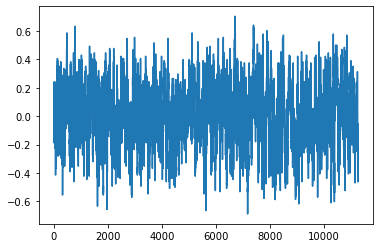

In [90]:
plt.plot(MagArrayT3)

In [91]:
#print(Mag2ArrayT3)

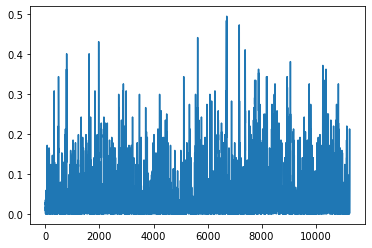

In [92]:
plt.plot(Mag2ArrayT3)

In [49]:
print(config)

[[-1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]
 [ 1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1]
 [ 1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1]
 [-1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1]
 [-1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [ ]:
# f = plt.figure(figsize=(18, 10)); # plot the calculated values    

# sp =  f.add_subplot(2, 2, 1 );
# plt.scatter(T, E, s=50, marker='o', color='IndianRed')
# plt.xlabel("Temperature (T)", fontsize=20);
# plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

# sp =  f.add_subplot(2, 2, 2 );
# plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
# plt.xlabel("Temperature (T)", fontsize=20); 
# plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

# sp =  f.add_subplot(2, 2, 3 );
# plt.scatter(T, C, s=50, marker='o', color='IndianRed')
# plt.xlabel("Temperature (T)", fontsize=20);  
# plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

# sp =  f.add_subplot(2, 2, 4 );
# plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
# plt.xlabel("Temperature (T)", fontsize=20); 
# plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [15]:
# change in energy is 8J
#    d          d               u          u        
# d  d  d => d  u  d   or    u  u  u => u  d  u  
#    d          d               u          u 
#     
# change in energy is 4J
#    d          d               u          u        
# d  d  u => d  u  u   or    u  u  d => u  d  d   
#    d          d               u          u 
#     
# Here u and d are used for up and down configuration of the spins

In [17]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

In [18]:
M1

3862

Text(0, 0.5, 'Net Magnetization')

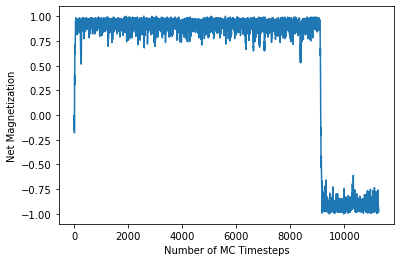

In [95]:
plt.plot(MagArrayT2)
plt.xlabel('Number of MC Timesteps')
plt.ylabel('Net Magnetization')

[1]	Singh, R. Ising Model. https://rajeshrinet.github.io/blog/2014/ising-model/ (accessed Feb 5, 2023).